In [1]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sb
from sklearn.model_selection import train_test_split
import nltk

2022-02-13 13:00:27.179775: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [3]:
dataset=pd.read_csv("labeled_data.csv")
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
dataset['class']=dataset['class'].apply(lambda x:0 if x==2 else 1)

/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

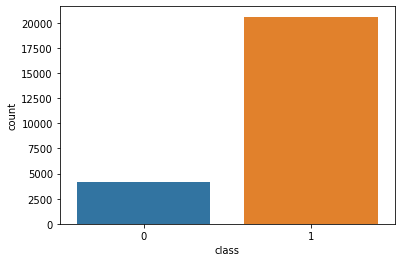

In [5]:
import seaborn as sb
sb.countplot(dataset['class'])

<AxesSubplot:>

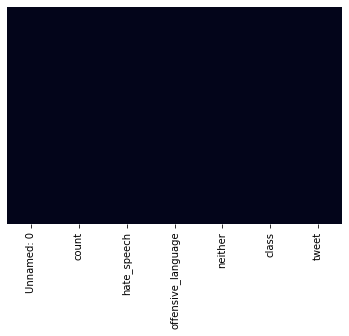

In [6]:
sb.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [7]:
print(dataset.groupby(['class']).size())

class
0     4163
1    20620
dtype: int64


In [8]:
dataset.shape

(24783, 7)

In [10]:
# todrop=[]
# count=0
# for ind,row in  dataset.iterrows():
#   if(row['class']==1):
#     todrop.append(ind)
#     count+=1
#   if count==10000:
#     break

In [11]:
# dataset.drop(todrop,inplace=True)

In [12]:
# print(dataset.groupby(['class']).size())

class
0     4163
1    10620
dtype: int64


/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

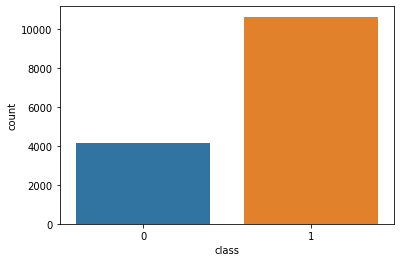

In [13]:
# sb.countplot(dataset['class'])

In [9]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
                           "]+", flags=re.UNICODE)
    emoji_pattern.sub('',text);
    return text;

In [10]:
def clean_dataset(text):
    sentence=remove_emojis(text)
    sentence=re.sub('[^a-zA-Z]',' ',sentence)
    sentence=re.sub(r'\s+[a-zA-Z]\s+',' ',sentence)
    sentence=re.sub(r'\s+',' ',sentence)
    return sentence

In [12]:
# Preprocessing tweets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wnl=WordNetLemmatizer()

stop = stopwords.words('english')
dataset['tweet']=dataset['tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

x=[]
for i in dataset.index:
  temp_list=nltk.word_tokenize(dataset['tweet'][i])
  dataset['tweet'][i]=' '.join([wnl.lemmatize(words) for words in temp_list])
  x.append(clean_dataset(dataset['tweet'][i]))

[nltk_data] Downloading package stopwords to /home/rdev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rdev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/rdev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rdev/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rdev/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/tmp/ipykernel_208103/2381712162.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['tweet'][i]=' '.join([wnl.lemmatize(words) for words i

In [13]:
x[0]

' RT mayasolovely As woman complain cleaning house amp man always take trash out '

In [14]:
y=dataset['class']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer()
# train_data=cv.fit_transform(x_train)
# test_data=cv.transform(x_test)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(x_train)
test_data=vec.transform(x_test)

/home/rdev/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

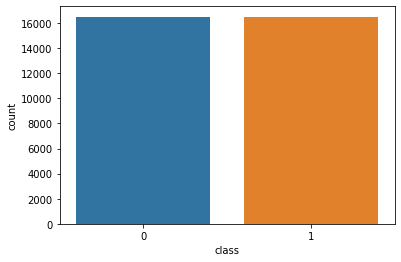

In [17]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority',random_state=42)
oversampled_x,oversampled_y=sm.fit_resample(train_data,y_train)
sb.countplot(oversampled_y)

In [20]:
# Using multinomialNB
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(oversampled_x,oversampled_y)

MultinomialNB()

In [21]:
predictions=model.predict(test_data)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.81      0.77       841
           1       0.96      0.94      0.95      4116

    accuracy                           0.92      4957
   macro avg       0.84      0.87      0.86      4957
weighted avg       0.92      0.92      0.92      4957

[[ 682  159]
 [ 259 3857]]


In [24]:
from sklearn.svm import SVC
model=SVC(C=1.0,kernel='linear',degree=3)
model.fit(oversampled_x,oversampled_y)

SVC(kernel='linear')

In [25]:
predictions=model.predict(test_data)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       841
           1       0.98      0.96      0.97      4116

    accuracy                           0.95      4957
   macro avg       0.91      0.94      0.92      4957
weighted avg       0.96      0.95      0.95      4957

[[ 765   76]
 [ 155 3961]]


In [27]:
data=list(y_test)
comments=list(x_test)
for i in range(5):
  print("prediction  - ",predictions[i],"   real - ",data[i])

prediction  -  0    real -  1
prediction  -  1    real -  1
prediction  -  1    real -  1
prediction  -  1    real -  1
prediction  -  1    real -  1


In [31]:
# Predicting on single comment
comment1=input("Enter the comment - ")
comment2=input("Enter 2nd comment - ")
vec1=vec.transform([comment1])
vec2=vec.transform([comment2])
prediction1 = model.predict(vec1)
prediction2 = model.predict(vec2)
print("comment - ",comment1,"   prediction - ",prediction1)
print("comment - ",comment2,"   prediction - ",prediction2)

Enter the comment - These girls always help me
Enter 2nd comment - This is shit throw this out
comment -  These girls always help me    prediction -  [0]
comment -  This is shit throw this out    prediction -  [1]


In [33]:
import pickle
pickle.dump(model,open("model1.pkl",'wb'))
pickle.dump(vec,open("vec.pkl",'wb'))